## CP for DSAI

### Lab 02 / Logistic Regression - Binary Classification

#### Name = "Muhammad Omer Farooq Bhatti"
#### Id   = "st122498"

The function $g(\boldsymbol{\theta}^T\mathbf{x})$ is a squashing or activation function and is required for Binary Classification task.

$$g(\boldsymbol{\theta}^T\mathbf{x}) = [0, 1]$$

$$ \mathbf{h} = g(\boldsymbol{\theta}^T\mathbf{x}) = \frac{1}{1+e^{-\boldsymbol{\theta}^T\mathbf{x}}} $$

\begin{aligned}
    \frac{dg}{dx} &= \frac{0(1 + e^{-x}) - (-1)(e^{-x}))}{(1 + e^{-x})^2} \\
    &= \frac{e^{-x}}{(1 + e^{-x})^2}  = \frac{e^{-x} + 1 - 1}{(1 + e^{-x})^2} \\
    &= \frac{1}{(1 + e^{-x})} - \frac{1}{(1 + e^{-x})^2} \\
    &= \frac{1}{(1 + e^{-x})} \big(1 - \frac{1}{(1 + e^{-x})}\big)\\
    &= g(1 - g)
\end{aligned}

### Binary Classification
**Implementation steps:**
    
1. Prepare your data
    - add intercept
    - $\mathbf{X}$ and $\mathbf{y}$ and $\mathbf{w}$ in the right shape
        - $\mathbf{X}$ -> $(m, n)$
        - $\mathbf{y}$ -> $(m, )$
        - $\mathbf{w}$ -> $(n, )$
        - where $m$ is number of samples
        - where $n$ is number of features
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict and calculate the loss
    - The loss function is the *cross entropy* defined as
    $$J = - (\sum_{i=1}^m y^{(i)}\log(h) + (1-y^{(i)})\log(1-h))$$
    where h is defined as the sigmoid function as
    $$h = \frac{1}{1+e^{-\boldsymbol{\theta}^T\mathbf{x}}}$$
3. Calculate the gradient based on the loss
    - The gradient of $\theta_j$ is defined as
        $$\frac{\partial J}{\partial \theta_j} = \sum_{i=1}^{m}(h^{(i)}-y^{(i)})x_j$$
    - This can be derived by knowing that 
        $$J= - (y \log h + (1 - y) \log (1-h))$$
        $$h = \frac{1}{1+e^{-g}}$$
        $$g = \theta^Tx$$
    - Thus, gradient of $J$ in respect to some $\theta_j$ is
        $$\frac{\partial J}{\partial \theta_j} = \frac{\partial J}{\partial h} \frac{\partial h}{\partial g} \frac{\partial g}{\partial \theta_j}$$
      where
        $$\frac{\partial J}{\partial h} = \frac{h - y}{h(1-h)}$$
        $$\frac{\partial h}{\partial g} = h(1-h)$$
        $$\frac{\partial g}{\partial \theta_j} = x_j$$
    - Thus, 
    $$
    \begin{aligned}
    \frac{\partial J}{\partial \theta_j} &= \frac{\partial J}{\partial h} \frac{\partial h}{\partial g} \frac{\partial g}{\partial \theta_j}\\
   &= \frac{h - y}{h(1-h)} * h(1-h) * x_j\\
   &= (h - y)x_j\\
   \end{aligned}$$
4. Update the theta with this update rule
    $$\theta_j := \theta_j - \alpha * \frac{\partial J}{\partial \theta_j}$$
    where $\alpha$ is a typical learning rate range between 0 and 1
5. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tolerance

Getting data
sklearn.datasets.make_classification() - Generates a random n-class classification problem.
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

# Step #2 - Fit the Algorithm

$$J = - (\sum_{i=1}^m y^{(i)}\log(h) + (1-y^{(i)})\log(1-h))$$

$$J= - (y \log h + (1 - y) \log (1-h))$$
$$h = \frac{1}{1+e^{-g}}$$
$$g = \theta^Tx$$

\begin{aligned}
    Gradient of cost function, \frac{\partial J}{\partial \theta_j} &= \frac{\partial J}{\partial h} \frac{\partial h}{\partial g} \frac{\partial g}{\partial \theta_j}\\
   &= \frac{h - y}{h(1-h)} * h(1-h) * x_j\\
   &= (h - y)x_j\\
   \end{aligned}
   
$$\theta_j := \theta_j - \alpha * \frac{\partial J}{\partial \theta_j}$$

In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [8]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [9]:
class logisticRegression:
    def __init__(self, X, y, l_rate=0.004, max_iterations=1000, scaling=True, plot=True, method = 'minibatch'):
        if (scaling):
            X=self.featureScale(X)
        #adding intercepts column in X matrix
        self.X_train=self.add_intercept_column(X)
        self.y_train=y
        self.plot=plot
        self.theta=[]
        self.max_iter=max_iterations
        self.alpha = l_rate
             
    def fit(self):
        print("The data loaded is of shape {0}x{1}.".format(
            self.X_train.shape[0], self.X_train.shape[1]))
        print("The number of features is {0}.".format(
            self.X_train.shape[1]-1))   
        print("The number of samples are {0}".format(
            self.X_train.shape[0]))
        print("Starting Mini-Batch Gradient Descent on Feature Vector X of size {0}x{1}...".format(
            self.X_train.shape[0], self.X_train.shape[1]))
        self.theta, n_iter = self.mini_batch_GD(
            self.X_train, self.y_train, self.max_iter, self.plot)
        print("Finished Mini-Batch Gradient Descent on Feature Vector X of size {0}x{1} in {2} iterations.".format(
            self.X_train.shape[0], self.X_train.shape[1], n_iter ))
    
    def featureScale(self,_X):
        scaler=StandardScaler()
        _X=scaler.fit_transform(_X)
        return _X
    
    def add_intercept_column(self,_X):
        #Concatenating the intercept to training set as variable b of shape = (no. of samples used for training, 1)
        b=np.ones((_X.shape[0],1))
        _X = np.concatenate((b, _X), axis=1)
        
        return _X

    
    def mini_batch_GD(self, X,y, max_iter, plot):
        #Using mini-batch Gradient Descent with replacement
        _theta=np.zeros(X.shape[1])
        batch_size = int(0.1*(X.shape[0]))
        #alpha = 0.001
        J_iter=np.zeros(max_iter)
        for i in range(max_iter):
            
            index=np.random.randint(0,X.shape[0]) #choose a contiguous block of samples of sizs = batch_size at random
            xtrain=X[index:index+batch_size]
            ytrain=y[index:index+batch_size]

            cost, grad = self.gradient(_theta, X, y)
            J_iter[i]= cost
            _theta = _theta - self.alpha * grad
            
        if (plot==True):
            self.plot_J_iter(J_iter,i)
        return _theta,i

    def plot_J_iter(self, J_iter, n_iter):
        plt.plot(np.arange(1,n_iter,1), J_iter[0:n_iter-1])
        plt.xlabel("Number of iterations")
        plt.ylabel("Loss")
        plt.title("Loss function vs No. of Iterations ")
        
    def sigmoid(self, X, deriv = False):
        g = 1/(1+np.exp(-X))     #Where X = X@theta
        if deriv==True:
            g_deriv = g*(1-g)    #It may be useful to plot the derivative function as value of alpha (learning rate)
            return g_deriv       #is limited by the maximum value of the derivative function
        else:
            return g

    def h_theta(self, X, _theta):
        return self.sigmoid(np.dot(X,_theta))

    def gradient(self, _theta, X, y):
        h = self.h_theta(X,_theta)
        error = h-y
        grad = np.dot(X.T, error) #(X(mxn) dot error(mx1) not right as (n!=m) so we do X.T(nxm) dot error(mx1) = grad(nx1) )
        cost = -np.sum( y*np.log(h) + (1-y)*np.log(1-h) )
        return cost, grad

    def predict(self, xtest):
        ##Concatenating the intercept to testing set as variable b of shape = (no. of samples used for testing, 1)
        #adding intercepts column in X matrix
        xtest = self.add_intercept_column(xtest)

        return np.round(self.h_theta(xtest, self.theta))

In [10]:
class classificationReport:
    def __init__(self, y_test, y_hat):
        self.ytest = y_test
        self.yhat = y_hat
        
        for (p,n) in [(0,1), (1,0)]:
            print("------------------------------------------------\n")
            print(f"Computing for Positive = {p}, Negative = {n}")
            self.c_matrix, n_TP, n_FP, n_FN, n_TN = self.confusion_matrix(self.ytest, self.yhat, p, n)
            self.accuracy = self.calc_accuracy(n_TP, n_TN, n_FP, n_FN)
            self.precision = self.calc_precision(n_TP, n_FP)
            self.recall = self.calc_recall(n_TP, n_FN)
            self.f1 = self.calc_f1()
            print(f"Accuracy:  {self.accuracy}")
            print(f"Precision:  {self.precision}")
            print(f"Recall:  {self.recall}")
            print(f"F1:  {self.f1}")
            print("\n------------------------------------------------\n")
        
    def calc_accuracy(self, n_TP, n_TN, n_FP, n_FN):
        return ( n_TP + n_TN ) / ( n_TP + n_TN + n_FP + n_FN )
        
    def calc_precision(self, n_TP, n_FP):
        return ( n_TP ) / ( n_TP + n_FP )
    
    def calc_recall(self, n_TP, n_FN):
        return ( n_TP ) / ( n_TP + n_FN )
    
    def calc_f1(self):
        return 2 * ( self.precision * self.recall ) / ( self.precision + self.recall )
    
    def confusion_matrix(self, ytest, yhat, p, n):
        c_matrix = []
        n_TP=0
        n_FP=0
        n_FN=0
        n_TN=0
        
        for i in range(len(ytest)):
            if ( (ytest[i]==p) and (yhat[i] == p) ):
                c_matrix.append("TP")
                n_TP+=1
            elif ( (yhat[i]==p) and (ytest[i]==n)  ):
                c_matrix.append("FP")
                n_FP+=1
            elif ( (yhat[i]==n) and (ytest[i]==p)  ):
                c_matrix.append("FN")
                n_FN+=1
            elif ( (yhat[i]==n) and (ytest[i]==n)  ):
                c_matrix.append("TN")
                n_TN+=1
        return c_matrix, n_TP, n_FP, n_FN, n_TN
                

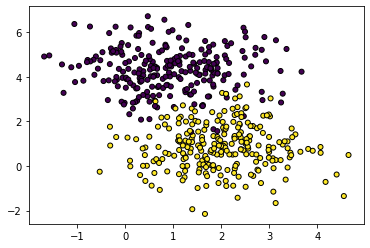

In [26]:
X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

The data loaded is of shape 350x3.
The number of features is 2.
The number of samples are 350
Starting Mini-Batch Gradient Descent on Feature Vector X of size 350x3...
Finished Mini-Batch Gradient Descent on Feature Vector X of size 350x3 in 4999 iterations.
The computed parameter space, theta = [ 0.24669521  0.95217017 -5.09491161]
------------------------------------------------

Computing for Positive = 0, Negative = 1
Accuracy:  0.7133333333333334
Precision:  0.656
Recall:  1.0
F1:  0.7922705314009661

------------------------------------------------

------------------------------------------------

Computing for Positive = 1, Negative = 0
Accuracy:  0.7133333333333334
Precision:  1.0
Recall:  0.36764705882352944
F1:  0.5376344086021506

------------------------------------------------



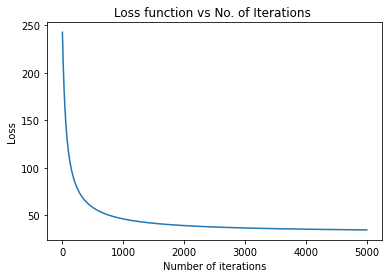

In [27]:
model = logisticRegression(X_train,y_train, l_rate = 0.0001, max_iterations = 5000)
model.fit()
yhat = model.predict(X_test)
print(f"The computed parameter space, theta = {model.theta}")
report = classificationReport(y_test, yhat)

In [28]:
from sklearn.metrics import classification_report
print("=========Classification report=======")
print(classification_report(y_test, yhat))

=========Classification report=======
              precision    recall  f1-score   support

           0       0.66      1.00      0.79        82
           1       1.00      0.37      0.54        68

    accuracy                           0.71       150
   macro avg       0.83      0.68      0.66       150
weighted avg       0.81      0.71      0.68       150

